In [1]:
!pip install -r requirements.txt | grep -v 'already satisfied'

In [2]:
Phillippines_Data = '1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY'

In [3]:
InputFiles = {'Expenditures':(Phillippines_Data,'Expenditures'),
              'HH Characteristics':(Phillippines_Data,'HH Characteristics'),
              'FCT':(Phillippines_Data,'FCT'),
              'Quantities':(Phillippines_Data,'Quantities'),
             'Prices Per Household':(Phillippines_Data,'Prices Per Household')}
InputFiles

{'Expenditures': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'Expenditures'),
 'HH Characteristics': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'HH Characteristics'),
 'FCT': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY', 'FCT'),
 'Quantities': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY', 'Quantities'),
 'Prices Per Household': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'Prices Per Household')}

In [4]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get prices
# Get prices
p = get_clean_sheet(InputFiles['Prices Per Household'][0],
                    sheet=InputFiles['Prices Per Household'][1])

if 'm' not in p.columns:  # Supply "market" indicator if missing
    p['m'] = 1

p = p.set_index(['t','i', 'm'])
p.columns.name = 'j'

p = p.apply(lambda x: pd.to_numeric(x,errors='coerce'))
p = p.replace(0,np.nan)

for i in p.columns:
    p[i] = p[i].median()

fct = get_clean_sheet(InputFiles['FCT'][0],
                    sheet=InputFiles['FCT'][1])

c = read_sheets(Phillippines_Data,sheet = 'Code Match ')
c.rename(columns ={'Code ':'fct'}, inplace = True)
fct = fct.merge(c, how = 'inner', on = 'fct').drop(columns = ['Member', 'Food ', 'bouisfg', 'foodgrp'], axis = 1)
print (fct)
fct = fct.set_index('name')
fct.columns.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
     fct                name  calorie  protein  fat  carbo  fiber  ash   
0      4  Rice milled, white    367.0      7.4  0.5   80.4    0.4  0.6  \
1     22        Corn, yellow    167.0      4.4  1.5   35.4    1.1  0.8   
2     28  Corn, white, grits    368.0      8.7  2.2   76.7    2.3  0.5   
3     47    Guava, red flesh     92.0      0.9  0.4   23.8    4.8  0.6   
4     67              Durian    147.0      2.0  1.2   36.1    1.9  0.8   
..   ...                 ...      ...      ...  ...    ...    ...  ...   
70  1318     Coconut vinegar      3.0      0.0  0.1    1.4    NaN  0.3   
71  1320                 Tea    357.0     21.7  1.0   65.3   11.2  4.6   
72  1324                Milo    396.0      6.5  4.5   84.9    0.4  2.2   
73  1325          Softdrinks     39.0      0.0  0.0   10.0    0.0  NaN   
74  1330                Beer     42.0      0.3  0.0    3.8    NaN  0

Here, use data on log *expenditures* and household characteristics to
create a CFEDemand `result`.

In [5]:
import cfe

#result = cfe.Regression(y=np.log(x.stack()),d=z)

#result.to_pickle('phillippines_estimates.pickle')
result = cfe.read_pickle('phillippines_estimates.pickle')  # Get persistent result saved above...

result.get_beta().sort_values(ascending=False) # Check sanity...

Missing dependencies for OracleDemands.


j
Petsay                                           1.414160
Calamansi                                        1.339474
Banana                                           1.258774
Fresh fish                                       1.230214
Atsal                                            1.222281
Talong                                           1.221671
Eggs                                             1.210041
Onions                                           1.181240
Milk                                             1.171247
Sitao                                            1.165865
Tomatoes                                         1.135643
Chicken                                          1.122036
Sea weed                                         1.101497
Ampalaya                                         1.080146
Processed meat like longanisa                    1.067363
Coke                                             1.055831
Cooking oil                                      1.040216
Milo        

In [6]:
%matplotlib notebook

x_1d = x.groupby('j',axis=1).sum()
x_1d = x_1d.replace(0,np.nan) # Replace zeros with missing

y = np.log(x_1d)

from cfe.estimation import drop_columns_wo_covariance
y = drop_columns_wo_covariance(y,min_obs=30)

y = y.stack()

#df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
#df.plot.scatter(x = 'yhat', y = 'y')

In [7]:
#result.graph_beta()

In [8]:
import cfe
    
# compute quantity consumed, relevant nutritional data, and nutrients per household 
# from predicted expenditures, nutritional data, and prices
def hh_nutrients(expenditures, nutrition, prices):
    # Expenditures divided by prices/g gives quantities in grams...
    qhat = (expenditures.unstack('j')/prices).dropna(how='all')
    # Drop missing columns
    qhat = qhat.loc[:,qhat.count()>0]
    # translate qhat names to match fct names
    translate = get_clean_sheet(Phillippines_Data, sheet='Code Match ')
    translate = translate.drop(['Member', ''], axis=1)
    translate = translate[translate['Food'].isin(list(qhat.columns))]
    # select only the food names found in both our nutritional data table AND in our quantities table
    fct_names = nutrition[nutrition['fct'].isin(list(translate['Code']))].reset_index()[['name', 'fct']]
    translate_names = translate.merge(fct_names, left_on='Code', right_on='fct')
    names_dict = dict(zip(list(translate_names['Food']), list(translate_names['name'])))
    qhat_fct = qhat.rename(columns=names_dict)
    # select relevant data and remove duplicates
    use = nutrition.index.intersection(qhat_fct.columns)
    nut_fct = nutrition[~nutrition.index.duplicated(keep='first')].loc[use]
    qhat_fct = qhat_fct.loc[:,~qhat_fct.columns.duplicated(keep='first')][use]
    # find the average nutritional content for each household
    return (qhat_fct, nut_fct, qhat_fct[use]@nut_fct.loc[use,:])

xhat = result.predicted_expenditures()

qhat_fct, nut_fct, nutrients = hh_nutrients(xhat, fct, p)

# average nutritional content per year for each household
# nutrients
# average nutritional content per day for each household (6.75 people per household)
nutrients = nutrients / 365
nutrients

Key available for students@eep153.iam.gserviceaccount.com.


,,n,fct,calorie,protein,fat,carbo,fiber,ash,calcium,phos,iron,retinol,carotene,thiamine,riboflav,niacin,ascorbic,edpor,blufct,
i,t,m,,,,,,,,,,,,,,,,,,,
2.0,2003.0,Bukidnon,49233.958470,27664.913279,930.138152,419.178904,4940.062100,NaN,NaN,5876.945313,12798.359853,164.049813,3265.052395,24864.025937,9.383016,9.411095,257.361684,NaN,9957.870834,NaN,NaN
4.0,2003.0,Bukidnon,61225.743018,32103.369053,1164.664280,493.375687,5639.438115,NaN,NaN,7845.309860,15684.106297,234.876387,4560.048244,34461.238259,11.933224,13.209585,316.693289,NaN,12269.276503,NaN,NaN
5.0,2003.0,Bukidnon,21507.908987,11310.006806,374.983717,160.183155,2046.751819,NaN,NaN,2591.957311,5357.020809,76.883059,1450.016965,11018.476483,4.054933,4.207595,107.607188,NaN,4307.742415,NaN,NaN
6.0,2003.0,Bukidnon,88426.536864,33835.835529,1287.800034,583.488424,5726.674983,NaN,NaN,8888.572658,16836.490788,255.054005,5969.635720,36133.916837,12.160853,14.378846,354.131297,NaN,14133.404141,NaN,NaN
12.0,2003.0,Bukidnon,82591.714820,29105.194793,1215.127599,509.485895,4763.702252,NaN,NaN,7641.554337,15003.625248,224.006259,5538.203132,22946.934742,11.128311,13.327092,325.057203,NaN,11965.265715,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937.0,2003.0,Bukidnon,41291.043960,19711.211535,706.194243,315.768995,3457.642291,NaN,NaN,5149.959854,9465.661819,161.208927,2781.469847,25898.644033,7.575427,8.962018,191.180012,NaN,7760.103763,NaN,NaN
938.0,2003.0,Bukidnon,43048.927008,21399.089127,740.765561,306.199840,3851.006144,NaN,NaN,5218.169577,10247.557872,155.482348,2966.866327,19918.254483,7.902533,8.824414,206.558374,NaN,8243.342235,NaN,NaN
939.0,2003.0,Bukidnon,9807.440996,7416.172359,219.564810,65.163092,1449.594667,NaN,NaN,1376.756635,3369.979288,39.205734,656.956400,5284.354461,2.361002,1.966023,67.132790,NaN,2535.420346,NaN,NaN


In [9]:
rdi = get_clean_sheet(Phillippines_Data, sheet='RDI')
rdi_cols = rdi['n']
rdi_cleaned = rdi.drop('units', axis=1).set_index(['n'])
hh_char_cleaned = z.drop('log HSize', axis=1)
perhh_rdi = hh_char_cleaned@rdi_cleaned.T

def rdi_difference(hh_characteristics, hh_nutrients):
    # RDI calculations
    # for RDI of a specific household, will need age composition of household * relevant RDIs
    hh_char_cleaned = hh_characteristics.drop('log HSize', axis=1)
    household_rdi = hh_char_cleaned@rdi_cleaned.T
    # ensure both dataframes have same columns and indices
    rdi_use = household_rdi.columns.intersection(hh_nutrients.columns)
    index_use = household_rdi.index.intersection(hh_nutrients.index)

    hhsel_rdi = household_rdi[rdi_use].loc[index_use]
    nutsel_rdi = hh_nutrients[rdi_use].loc[index_use]
    #hhsel_rdi = hhsel_rdi.mean().drop(['fiber', 'ascorbic'])
    #nutsel_rdi = nutsel_rdi.mean().dropna()
    rdi_diff = nutsel_rdi - hhsel_rdi
    rdi_diff = rdi_diff.dropna(axis=1)
    return rdi_diff

# find difference between the actual household nutrient consumption and expected RDI of household
rdi_diff = rdi_difference(z, nutrients)
rdi_diff

Key available for students@eep153.iam.gserviceaccount.com.


,,n,calorie,protein,fat,carbo,calcium,phos,iron,retinol,thiamine,riboflav,niacin
i,t,m,,,,,,,,,,,
100.0,2003.0,Bukidnon,9325.513707,431.177041,-146.793079,3259.148113,-10.014427,4591.288854,34.175919,-319.124317,2.968975,3.088600,147.431089
101.0,2003.0,Bukidnon,-15202.275333,-366.659344,-753.799959,212.181096,-9631.599369,-5031.626103,-165.809815,-4425.638204,-7.304573,-8.667492,-37.145241
102.0,2003.0,Bukidnon,4029.735286,150.558379,-200.431759,2241.491281,-1243.792332,3541.848374,11.325127,-732.340379,0.222171,0.104583,88.021379
103.0,2003.0,Bukidnon,-4999.494506,235.960497,-450.625752,1821.968739,-4846.385089,-220.031380,-41.232970,-996.735943,-2.445994,-2.725557,97.053217
105.0,2003.0,Bukidnon,-1643.458648,64.296063,-419.243554,2350.465932,-4244.739945,2275.973336,-41.331805,-1546.503168,-2.386815,-2.123009,94.407893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940.0,2003.0,Bukidnon,14130.127731,646.719618,152.611168,3165.353281,3004.538810,8001.349484,94.015052,2352.212906,4.924749,6.518235,185.248074
941.0,2003.0,Bukidnon,17805.914514,717.974856,236.109626,3618.997074,3680.550422,9701.355170,139.209715,2525.640798,6.636063,8.271346,204.069534
95.0,2003.0,Bukidnon,-2086.254350,78.408379,-389.664151,1908.754247,-2929.668015,738.142069,13.605459,-1390.284105,-1.628774,-2.661142,63.812771


In [10]:
# calculate the calorie consumption per household by type of food consumed
#consumption_calories = qhat_fct[use]
#for col in consumption_calories.columns:
#    consumption_calories[col] = consumption_calories[col] * fct['calorie'].loc[col]
#consumption_calories

In [11]:
#import seaborn as sns
#import plotly.express as px

#top5_calorie = pd.DataFrame({'calories': consumption_calories.mean()}).sort_values(by='calories', ascending=False).head(5)
#px.bar(top5_calorie, x=list(top5_calorie.index), y=top5_calorie['calories'], title='Top 5 Calorie Contributors')

In [12]:
#calorie_norice = pd.DataFrame({'calories': consumption_calories.mean()}).sort_values(by='calories', ascending=False)[5:]
#px.bar(calorie_norice, x=list(calorie_norice.index), y=calorie_norice['calories'], title='Calorie Consumption Excluding Top 5')


In [13]:
import cfe

x2 = x * 2
r2 = cfe.Regression(y=np.log(x2.stack()),d=z)
r2.get_beta()
r2.predicted_expenditures()

# find differences between demand parameters
r2params = r2.demand_parameters()
rparams = result.demand_parameters()

In [14]:
# alpha: preference for a given good
a_diff = r2params[1]['alpha'] - rparams[1]['alpha']
#a_diff.sort_values(ascending=False)

In [15]:
adf_pd = pd.DataFrame({'alpha parameter difference': a_diff}).sort_values(by='alpha parameter difference', ascending=False)
adf_pd = pd.concat([adf_pd[:5], adf_pd[-5:]])
#px.bar(adf_pd, 
#       x=list(adf_pd.index), 
#       y=adf_pd['alpha parameter difference'], 
#       title='Difference in Alpha Parameter as a Result of Doubling Expenditures (5 biggest +/- differences)')

In [16]:
# beta: represents frisch elasticities (e.g. likelihood of fluctuation in purchasing amount)
b_diff = r2params[1]['beta'] - rparams[1]['beta']
#b_diff.sort_values(ascending=False)

In [17]:
bdf_pd = pd.DataFrame({'beta parameter difference': b_diff}).sort_values(by='beta parameter difference', ascending=False)
bdf_pd = pd.concat([bdf_pd[:5], bdf_pd[-5:]])
#px.bar(bdf_pd, 
#       x=list(bdf_pd.index), 
#       y=bdf_pd['beta parameter difference'], 
#       title='Difference in Beta Parameter as a Result of Doubling Expenditures (5 biggest +/- differences)')

In [18]:
pos_hh = [rdi_diff.loc[row].min() >= 0 for row in rdi_diff.index]
#rdi_diff.iloc[pos_hh]

In [19]:
poscal_hh = rdi_diff[rdi_diff['calorie'] >= 0]
#poscal_hh

In [20]:
rdi_cal_diff = rdi_diff['calorie'].sort_values(ascending=False)
#px.histogram(rdi_cal_diff, 
#       labels={'value':'calorie consumption relative to RDI'}, 
#               'count':'number of households'}, 
#       title='Household calorie Consumption Deviance from Recommended calorie Consumption')

### Nutrition as a Function of Demand

In [21]:
prices = p[list(result.get_beta().index)].mean() # select only the food items found in result
# average total expenditures by household
xbar = xhat.groupby(['i','t','m']).sum()

def my_prices(p0,p=prices,j='Eggs'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [22]:
UseNutrients = ['calorie','protein','calcium','carbo','iron']

fct_clean = fct[UseNutrients]
fct_clean = fct_clean.loc[~fct_clean.index.duplicated()]


# demands(x, p)
# x: simulated budget of household
# p: prices of foods to be simulated
def nutrient_demand(x,p):
    c = result.demands(x,p)    
    fct0,c0 = fct_clean.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

# nutritional content (of selected nutrients) as a function of prices
nutrient_demand(xbar.quantile(0.5), prices)

n
calorie    376400.746673
protein      4847.490028
calcium    116853.875697
carbo       95280.882382
iron         2284.217329
dtype: float64

<IPython.core.display.Javascript object>


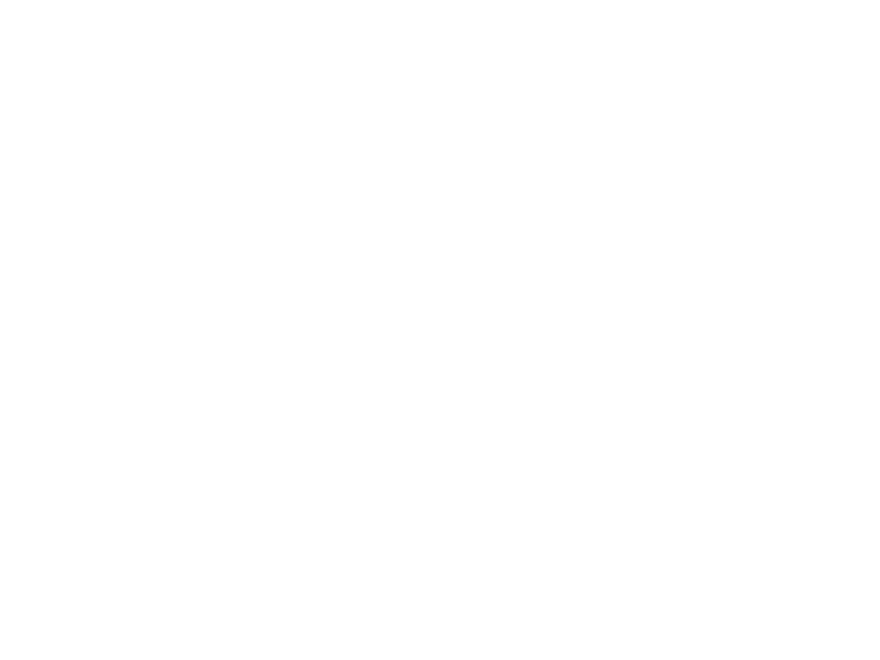

Text(0, 0.5, 'log nutrient')

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(xbar.quantile(0.5)/5,xbar.quantile(0.5)*5,50)

df = pd.concat({myx:np.log(nutrient_demand(myx,prices))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget')
ax.set_ylabel('log nutrient')

In [24]:
def nutrient_adequacy_ratio(x,p,d,rdi=perhh_rdi,days=1):
    hh_rdi = rdi.replace('',0)@d*days

    return nutrient_demand(x,p)/hh_rdi

#rdi.replace('', 0)@perhh_rdi
#perhh_rdi
#rdi.replace('', 0)['n']

In [25]:
#X = np.geomspace(.01*xbar.quantile(0.5),2*xbar.quantile(0.5),100)

#pd.DataFrame({x:np.log(nutrient_adequacy_ratio(x,prices,perhh_rdi))[UseNutrients] for x in X}).T.plot()
#plt.legend(UseNutrients)
#plt.xlabel('budget')
#plt.ylabel('log nutrient adequacy ratio')
#plt.axhline(0)
#plt.axvline(xbar.quantile(0.5))

### Change in Demand as a Result of Price Changes

Here, we analyze the change in demand as a result of price changes due to policies such as taxes and subsidies on foods.

In [26]:
food = 'Eggs'
new_price = prices[food] / 2

new_prices = my_prices(p0=new_price, p=prices, j=food)

# demands(x, p)
# x: simulated budget of household
# p: prices of foods to be simulated
result.demands(xbar.quantile(0.5), new_prices)

j
Alcoholic drinks                                  129.280804
Ampalaya                                          784.601225
Atsal                                            1014.545043
Bagoong                                            40.289851
Banana                                           3435.348504
Beef                                               87.003808
Calamansi                                        4605.914712
Carrots                                           324.691333
Chicken                                           215.556478
Coffee                                             19.435796
Coke                                              936.912702
Cooking oil                                       518.279444
Corn products                                     122.820934
Dried fish and smoked fish                         54.996760
Eggs                                             1162.816961
Food made from flour                              631.424789
Fresh fish            

<IPython.core.display.Javascript object>


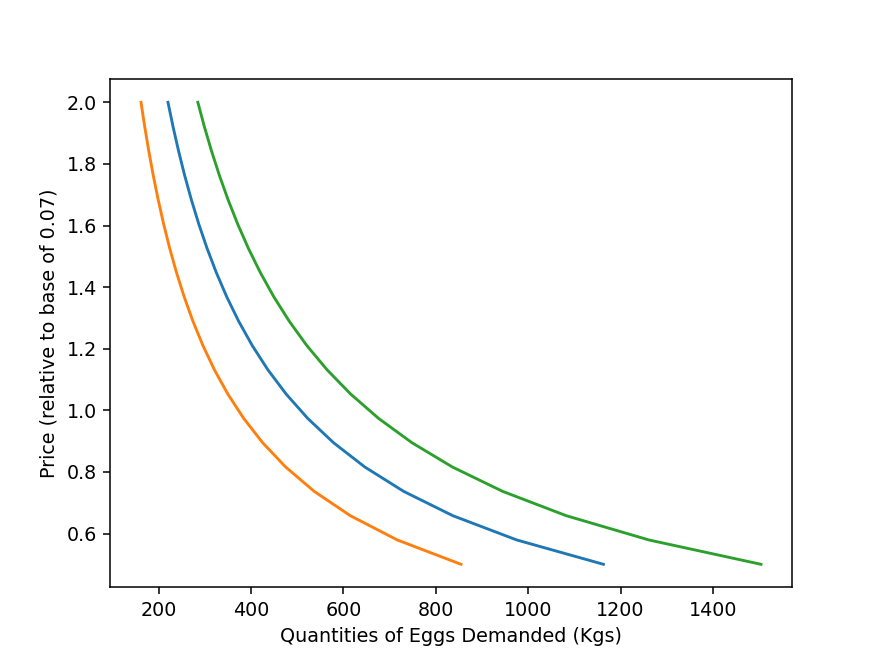

Text(0.5, 0, 'Quantities of Eggs Demanded (Kgs)')

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook

use = 'Eggs'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Millet for household at median budget
plt.plot([result.demands(xbar.quantile(0.5),my_prices(prices[use]*s,prices))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(prices[use]*s,prices))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(prices[use]*s,prices))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {prices[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded (Kgs)")

### Deadweight Loss Analysis

In [28]:
def compensating_variation(U0,p0,p1):
    x0 = result.expenditure(U0,p0)
    x1 = result.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = result.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

#def compensated_nutrient_adequacy_ratio(U,p):
#    return (compensated_nutrient_demand(U,p)/hh_rdi.T).squeeze()

<IPython.core.display.Javascript object>


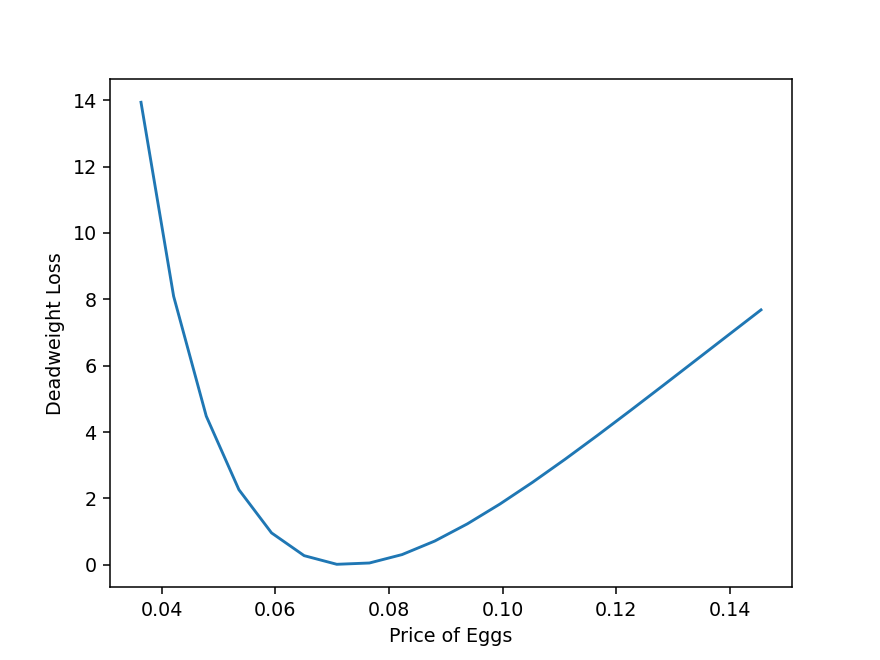

Text(0, 0.5, 'Deadweight Loss')

In [29]:
# Differences between revenue and compensating variation is deadweight-loss:
fig, ax1 = plt.subplots()

my_i = 'Eggs'
u0 = result.indirect_utility(xbar.quantile(0.5), prices)

ax1.plot(prices[my_i]*scale,[deadweight_loss(u0,prices,my_prices(p0,prices, my_i)) for p0 in prices[my_i]*scale])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")